In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

In [24]:
#------------------------------------------------Reading the dataframe-------------------------------------------------#

In [25]:
data = pd.read_csv('D:\Pazhavngadi Ganapathi\Git\concrete_data.csv')

In [26]:
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [27]:
data.describe()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [28]:
#-------------------------------------------Checking for data types---------------------------------------#

In [29]:
data.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [30]:
#-------------------------------- Checking for null values-----------------------------------------------#

In [31]:
data.isnull()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False


In [32]:
#-------------------------------------Checking if there are any null values---------------------------------#

In [33]:
data.isnull().values.any()

False

C:\Users\VEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cement'>

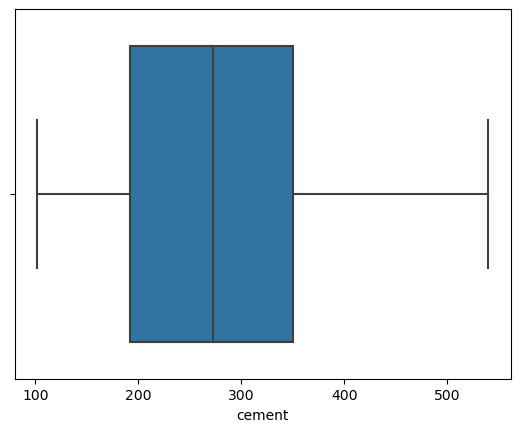

In [34]:
import seaborn as sns
sns.boxplot(data['cement'])

C:\Users\VEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='blast_furnace_slag'>

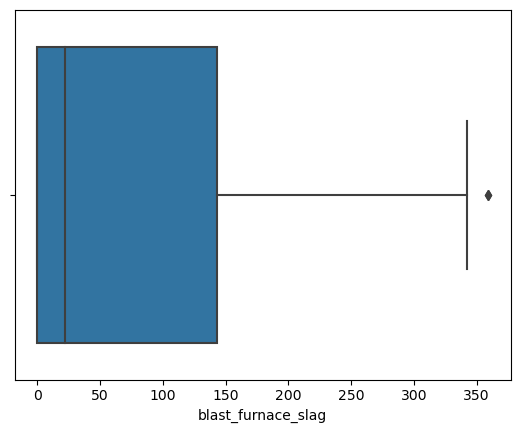

In [35]:
import seaborn as sns
sns.boxplot(data['blast_furnace_slag'])

In [36]:
k = data.loc[(data['blast_furnace_slag'] > 345)]
k

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


In [37]:
data = data.loc[(data['blast_furnace_slag'] <= 345)]

In [38]:
data

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


C:\Users\VEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fly_ash'>

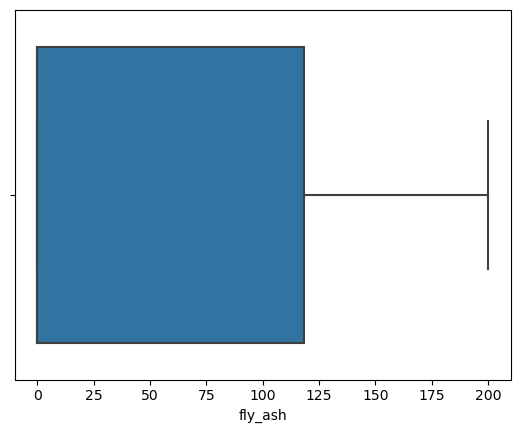

In [39]:
sns.boxplot(data['fly_ash'])

C:\Users\VEENA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='water'>

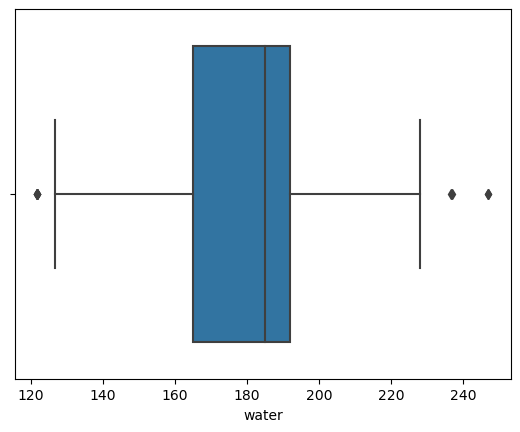

In [40]:
sns.boxplot(data['water'])

In [44]:
import pandas as pd
import numpy as np

# create sample dataframe with outliers


# calculate mean and standard deviation of each column
mean = data.mean()
std = data.std()

# define threshold for outlier detection
threshold = 3

# replace outliers with mean
for col in data.columns:
    data[col] = np.where((data[col] - mean[col]).abs() > threshold * std[col], mean[col], data[col])

print(data)


      cement  blast_furnace_slag  fly_ash  water  superplasticizer  \
0      540.0                 0.0      0.0  162.0               2.5   
1      540.0                 0.0      0.0  162.0               2.5   
2      332.5               142.5      0.0  228.0               0.0   
3      332.5               142.5      0.0  228.0               0.0   
4      198.6               132.4      0.0  192.0               0.0   
...      ...                 ...      ...    ...               ...   
1025   276.4               116.0     90.3  179.6               8.9   
1026   322.2                 0.0    115.6  196.0              10.4   
1027   148.5               139.4    108.6  192.7               6.1   
1028   159.1               186.7      0.0  175.6              11.3   
1029   260.9               100.5     78.3  200.6               8.6   

      coarse_aggregate  fine_aggregate         age  \
0               1040.0            676.0  28.000000   
1               1055.0            676.0  28.000000 

C:\Users\VEENA\AppData\Local\Temp\ipykernel_26848\1346700352.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = np.where((data[col] - mean[col]).abs() > threshold * std[col], mean[col], data[col])


In [47]:
y = data['concrete_compressive_strength']
X = data.drop('concrete_compressive_strength',axis = 1)

In [48]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1028, dtype: float64

In [49]:
X

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.000000
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.000000
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,45.716926
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,45.716926
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,45.716926
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.000000
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.000000
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.000000
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.000000


In [51]:
from sklearn.model_selection import train_test_split
seed = 50
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.333, random_state = seed)

In [52]:
sc = MinMaxScaler()

X_train_norm = sc.fit_transform(X_train)

X_test_norm = sc.transform(X_test)

In [57]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(random_state=16)

In [58]:
clf.fit(X_train_norm, y_train)

RandomForestRegressor(random_state=16)

In [59]:
y_pred = clf.predict(X_test_norm)

In [60]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8965707997372262

In [61]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [64]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

5.075785373334757